<a href="https://colab.research.google.com/github/edsondamasceno/Data-Analysis/blob/main/Analise_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de vendas de produtos por loja

## Importando bibliotecas

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

## Lendo a base de dados e exibindo

In [29]:
df = pd.read_excel('/content/drive/MyDrive/Data Analysis/Dataset/Vendas.xlsx')
display(df)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
100995,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
100996,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


## Faturamento total

In [30]:
faturamento_total = df['Valor Final'].sum()
print(faturamento_total)

41877063


## Faturamento final por loja

In [31]:
faturamento_por_loja = df[['ID Loja', 'Valor Final']].groupby('ID Loja').sum()
display(faturamento_por_loja)

,Valor Final
ID Loja,
Bourbon Shopping SP,1726110
Center Shopping Uberlândia,1668921
Iguatemi Campinas,1762419
Iguatemi Esplanada,1699681
Norte Shopping,1711968
Novo Shopping Ribeirão Preto,1678225
Palladium Shopping Curitiba,1721120
Parque Dom Pedro Shopping,1631630
Passei das Águas Shopping,1649014


In [32]:
#Exportando dados pro excel
faturamento_por_loja.to_excel('/content/drive/MyDrive/Data Analysis/Result/faturamento_por_loja.xlsx')

## Quantidade final de cada produto por loja

In [33]:
quantidade_por_loja = df[['ID Loja', 'Produto', 'Quantidade']].groupby(['ID Loja', 'Produto']).sum()
display(quantidade_por_loja)

Quantidade
ID Loja             Produto                     
Bourbon Shopping SP Bermuda                   69
                    Bermuda Estampa           71
                    Bermuda Linho             61
                    Bermuda Liso              62
                    Bermuda Listrado          75
...                                          ...
Shopping Vila Velha Tênis Estampa             66
                    Tênis Linho               86
                    Tênis Liso                65
                    Tênis Listrado            53
                    Tênis Xadrez              86

[3000 rows x 1 columns]

In [34]:
#Exportando dados pro excel
quantidade_por_loja.to_excel('/content/drive/MyDrive/Data Analysis/Result/quantidade_por_loja.xlsx')

## Faturamento final de cada loja por produto

In [35]:
faturamento_por_produto = df[['ID Loja', 'Produto', 'Valor Final']].groupby(['ID Loja', 'Produto']).sum()
display(faturamento_por_produto)

Valor Final
ID Loja             Produto                      
Bourbon Shopping SP Bermuda                 10350
                    Bermuda Estampa         11999
                    Bermuda Linho           11895
                    Bermuda Liso             9734
                    Bermuda Listrado        12225
...                                           ...
Shopping Vila Velha Tênis Estampa           16896
                    Tênis Linho             25284
                    Tênis Liso              17290
                    Tênis Listrado          13886
                    Tênis Xadrez            22274

[3000 rows x 1 columns]

In [36]:
#Exportando dados pro excel
faturamento_por_produto.to_excel('/content/drive/MyDrive/Data Analysis/Result/faturamento_por_produto.xlsx')

## Quantidade de produtos vendidos por loja

In [37]:
produto_por_loja = df[['ID Loja', 'Quantidade']].groupby('ID Loja').sum()
display(produto_por_loja)

,Quantidade
ID Loja,
Bourbon Shopping SP,8863
Center Shopping Uberlândia,8627
Iguatemi Campinas,8935
Iguatemi Esplanada,8580
Norte Shopping,9014
Novo Shopping Ribeirão Preto,8751
Palladium Shopping Curitiba,9091
Parque Dom Pedro Shopping,8388
Passei das Águas Shopping,8618


In [42]:
#Exportando dados pro excel
produto_por_loja.to_excel('/content/drive/MyDrive/Data Analysis/Result/produto_por_loja.xlsx')

## Ticket médio por produto em cada loja

In [64]:
ticket_medio = (faturamento_por_loja['Valor Final'] / produto_por_loja['Quantidade']).to_frame(name='ticket_medio')
display(ticket_medio)

,ticket_medio
ID Loja,
Bourbon Shopping SP,194.754598
Center Shopping Uberlândia,193.453228
Iguatemi Campinas,197.248909
Iguatemi Esplanada,198.098019
Norte Shopping,189.923231
Novo Shopping Ribeirão Preto,191.775226
Palladium Shopping Curitiba,189.321307
Parque Dom Pedro Shopping,194.519552
Passei das Águas Shopping,191.345324


In [65]:
#Exportando dados pro excel
ticket_medio.to_excel('/content/drive/MyDrive/Data Analysis/Result/ticket_medio.xlsx')

# Plotando Graficos

### Faturamento Total por Loja

In [39]:
fat_por_loja = pd.read_excel('/content/drive/MyDrive/Data Analysis/Result/faturamento_por_loja.xlsx')

In [40]:
fat_por_loja.head()

,ID Loja,Valor Final
0,Bourbon Shopping SP,1726110
1,Center Shopping Uberlândia,1668921
2,Iguatemi Campinas,1762419
3,Iguatemi Esplanada,1699681
4,Norte Shopping,1711968


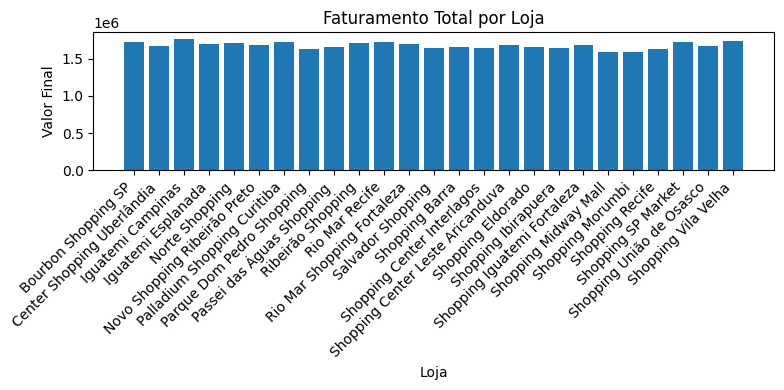

In [48]:
plt.figure(figsize=(8,4))
plt.bar(fat_por_loja['ID Loja'], fat_por_loja['Valor Final'])
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Final')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Quantidade de Produto por Loja

In [43]:
qtd_por_loja = pd.read_excel('/content/drive/MyDrive/Data Analysis/Result/produto_por_loja.xlsx')

In [45]:
qtd_por_loja.head()

,ID Loja,Quantidade
0,Bourbon Shopping SP,8863
1,Center Shopping Uberlândia,8627
2,Iguatemi Campinas,8935
3,Iguatemi Esplanada,8580
4,Norte Shopping,9014


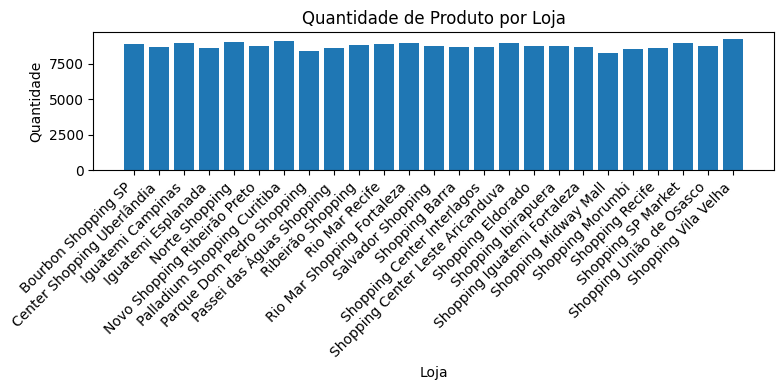

In [47]:
plt.figure(figsize=(8,4))
plt.bar(qtd_por_loja['ID Loja'], qtd_por_loja['Quantidade'])
plt.title('Quantidade de Produto por Loja')
plt.xlabel('Loja')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Ticket Médio por Produto em cada Loja

In [66]:
ticket = pd.read_excel('/content/drive/MyDrive/Data Analysis/Result/ticket_medio.xlsx')

In [67]:
ticket.head()

,ID Loja,ticket_medio
0,Bourbon Shopping SP,194.754598
1,Center Shopping Uberlândia,193.453228
2,Iguatemi Campinas,197.248909
3,Iguatemi Esplanada,198.098019
4,Norte Shopping,189.923231


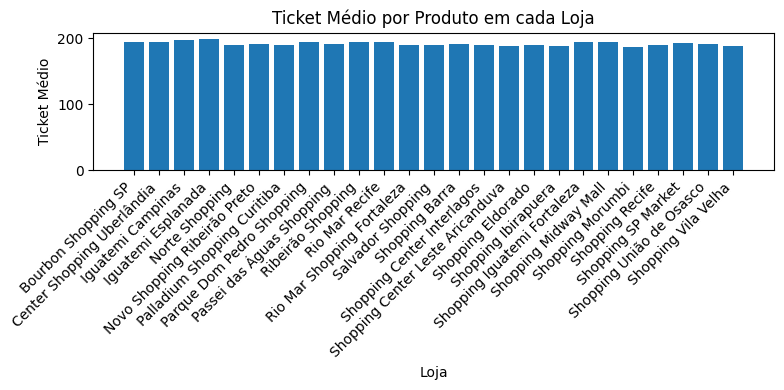

In [68]:
plt.figure(figsize=(8,4))
plt.bar(ticket['ID Loja'], ticket['ticket_medio'])
plt.title('Ticket Médio por Produto em cada Loja')
plt.xlabel('Loja')
plt.ylabel('Ticket Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Quantidade final de cada produto por loja

In [69]:
qtd_loja_produto = pd.read_excel('/content/drive/MyDrive/Data Analysis/Result/quantidade_por_loja.xlsx')

In [70]:
qtd_loja_produto.head()

,ID Loja,Produto,Quantidade
0,Bourbon Shopping SP,Bermuda,69
1,NaN,Bermuda Estampa,71
2,NaN,Bermuda Linho,61
3,NaN,Bermuda Liso,62
4,NaN,Bermuda Listrado,75


In [76]:
qtd_loja_produto['ID Loja'] = qtd_loja_produto['ID Loja'].ffill()

In [77]:
qtd_loja_produto.head()

,ID Loja,Produto,Quantidade
0,Bourbon Shopping SP,Bermuda,69
1,Bourbon Shopping SP,Bermuda Estampa,71
2,Bourbon Shopping SP,Bermuda Linho,61
3,Bourbon Shopping SP,Bermuda Liso,62
4,Bourbon Shopping SP,Bermuda Listrado,75


In [89]:
import plotly.express as px
import plotly.graph_objects as go

In [85]:
fig = px.bar(
    qtd_loja_produto,
    x='Produto',
    y='Quantidade',
    color='Produto',
    animation_frame='ID Loja',
    title='Quantidade de Produtos Vendidos por Loja'
)

fig.update_layout(
    xaxis_title='Produto',
    yaxis_title='Quantidade',
    showlegend=False
)

fig.show()

In [91]:
fig = go.Figure()

lojas = qtd_loja_produto['ID Loja'].unique()

for loja in lojas:
    df_loja = qtd_loja_produto[qtd_loja_produto['ID Loja'] == loja]

    fig.add_trace(
        go.Bar(
            x=df_loja['Produto'],
            y=df_loja['Quantidade'],
            name=loja,
            visible=False
        )
    )

# Primeira loja visível
fig.data[0].visible = True

# Dropdown
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": loja,
                    "method": "update",
                    "args": [
                        {"visible": [i == idx for i in range(len(lojas))]},
                        {"title": f"Quantidade Vendida - {loja}"}
                    ]
                }
                for idx, loja in enumerate(lojas)
            ],
            "direction": "down",
            "x": 0.1,
            "y": 1.15
        }
    ],
    title=f"Quantidade Vendida - {lojas[0]}",
    xaxis_title="Produto",
    yaxis_title="Quantidade"
)

fig.show()
